<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/Bining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [8]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(714, 3)

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


use DecisionTree Classifier

In [17]:
clf=DecisionTreeClassifier()


to check accuracy of model

In [18]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [19]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6232785602503912

apply bining

In [25]:
from sklearn.preprocessing import KBinsDiscretizer
kbin_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')

In [26]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])


In [27]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [30]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 19.  , 25.  , 32.  , 42.  , 80.  ])], dtype=object)

In [31]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal'),
 'second': KBinsDiscretizer(encode='ordinal')}

In [34]:
trf.named_transformers_['first'].n_bins_

array([5])

In [36]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [37]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [38]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
275,63.0,4.0,77.9583,4.0,"(42.0, 80.0]","(51.479, 512.329]"
482,50.0,4.0,8.0500,1.0,"(42.0, 80.0]","(7.896, 13.0]"
682,20.0,1.0,9.2250,1.0,"(19.0, 25.0]","(7.896, 13.0]"
566,19.0,1.0,7.8958,1.0,"(0.42, 19.0]","(0.0, 7.896]"
352,15.0,0.0,7.2292,0.0,"(0.42, 19.0]","(0.0, 7.896]"


In [39]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)
accuracy_score(y_test,y_pred2)

0.6433566433566433

In [40]:
x_trf=trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy'))

0.673943661971831

In [44]:
def discretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    ])
    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy')))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Age')
    plt.show()

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('Fare')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6655320813771518


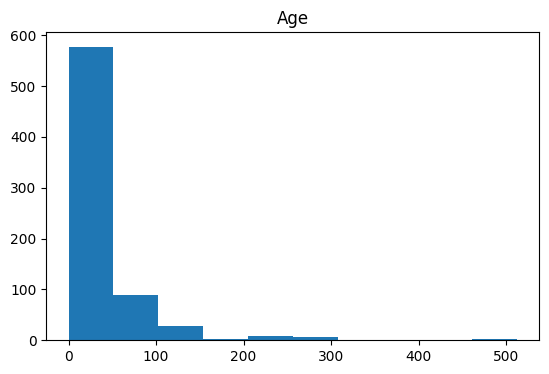

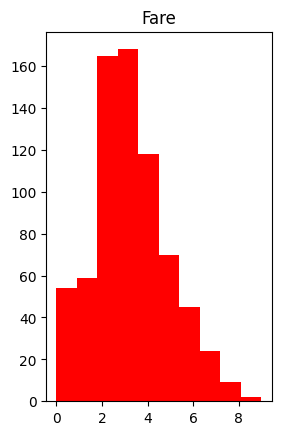

In [48]:
discretize(10,'kmeans')